Main Questions:

- Which U.S. state has the best market conditions for a new restaurant or takeout business?

- What type of restaurant (eg., fast food, casual dining, fine dining, ethnic cuisine) has the highestr success rate?

- What demographic, economic and consumer behavior factors influence restaurant success?

US Population Data (By State) ~ 2020 to 2024

In [14]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('Datasets/Population Data (2020-2024).csv')

df.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RINTERNATIONALMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RDOMESTICMIG2024,RNETMIG2021,RNETMIG2022,RNETMIG2023,RNETMIG2024
0,40,3,6,1,Alabama,5025369,5033094,5049196,5076181,5117673,...,2.549575,3.068113,4.993905,5.575299,5.875305,5.066094,5.351760,7.186103,8.424880,8.134207
1,40,4,9,2,Alaska,733395,733017,734420,734442,736510,...,4.610620,5.456972,-4.685721,-7.940841,-6.643317,-5.111594,-3.495891,-4.103857,-2.032697,0.345378
2,40,4,8,4,Arizona,7158110,7187135,7274078,7377566,7473027,...,7.106383,8.566488,11.557122,9.390073,4.741629,4.636473,12.665881,13.950789,11.848012,13.202961
3,40,3,7,5,Arkansas,3011553,3014546,3026870,3047704,3069463,...,1.623627,1.998111,5.257046,6.213769,5.826553,4.373303,5.702968,8.247492,7.450181,6.371414
4,40,4,9,6,California,39555674,39521958,39142565,39142414,39198693,...,7.472986,9.183701,-12.142348,-8.602084,-8.782848,-6.093734,-11.020444,-2.599579,-1.309862,3.089967


In [16]:
#Dropping unnecessary rows

#df = df.drop(index=list(range(0, 13)))
#df = df.drop(index = 13)

df.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RINTERNATIONALMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RDOMESTICMIG2024,RNETMIG2021,RNETMIG2022,RNETMIG2023,RNETMIG2024
0,40,3,6,1,Alabama,5025369,5033094,5049196,5076181,5117673,...,2.549575,3.068113,4.993905,5.575299,5.875305,5.066094,5.351760,7.186103,8.424880,8.134207
1,40,4,9,2,Alaska,733395,733017,734420,734442,736510,...,4.610620,5.456972,-4.685721,-7.940841,-6.643317,-5.111594,-3.495891,-4.103857,-2.032697,0.345378
2,40,4,8,4,Arizona,7158110,7187135,7274078,7377566,7473027,...,7.106383,8.566488,11.557122,9.390073,4.741629,4.636473,12.665881,13.950789,11.848012,13.202961
3,40,3,7,5,Arkansas,3011553,3014546,3026870,3047704,3069463,...,1.623627,1.998111,5.257046,6.213769,5.826553,4.373303,5.702968,8.247492,7.450181,6.371414
4,40,4,9,6,California,39555674,39521958,39142565,39142414,39198693,...,7.472986,9.183701,-12.142348,-8.602084,-8.782848,-6.093734,-11.020444,-2.599579,-1.309862,3.089967


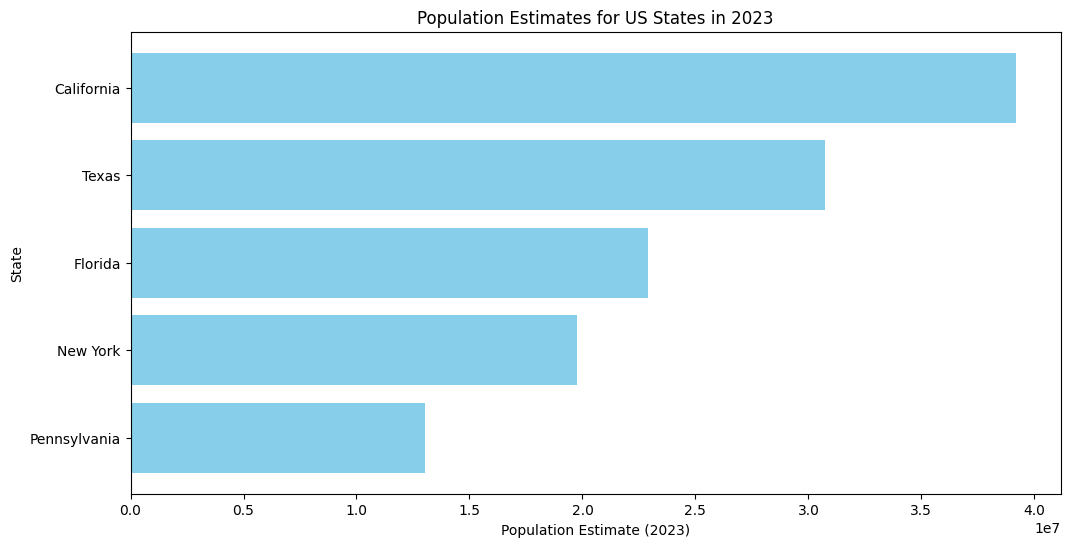

In [17]:
#Plotting the population by state and selecting the top 5 states

#Extracting state names and population estimates for 2024
states = df["NAME"]
pop_est = df["POPESTIMATE2023"]
top_states = pop_est.nlargest(5).index #index of top 5 states
toppop_est = pop_est[top_states] #Population values of top 5 states
top_states_names = states[top_states] #State names

#plot the data
plt.figure(figsize=(12, 6))
plt.barh(top_states_names, toppop_est, color="skyblue")
plt.xlabel("Population Estimate (2023)")
plt.ylabel("State")
plt.title("Population Estimates for US States in 2023")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [18]:
#Top 5 States with Highest Consumer Spending Amounts

cs_df = pd.read_excel('Datasets/pce1024.xlsx')

cs_df.head()

,States,2021,2022,2023,2022.1,2023.1
0,United States,16113945,17690841,18822769,9.8,6.4
1,New England,859185,933796,995393,8.7,6.6
2,Connecticut,205529,220974,235580,7.5,6.6
3,Maine,71498,78323,84093,9.5,7.4
4,Massachusetts,416511,453804,483803,9.0,6.6


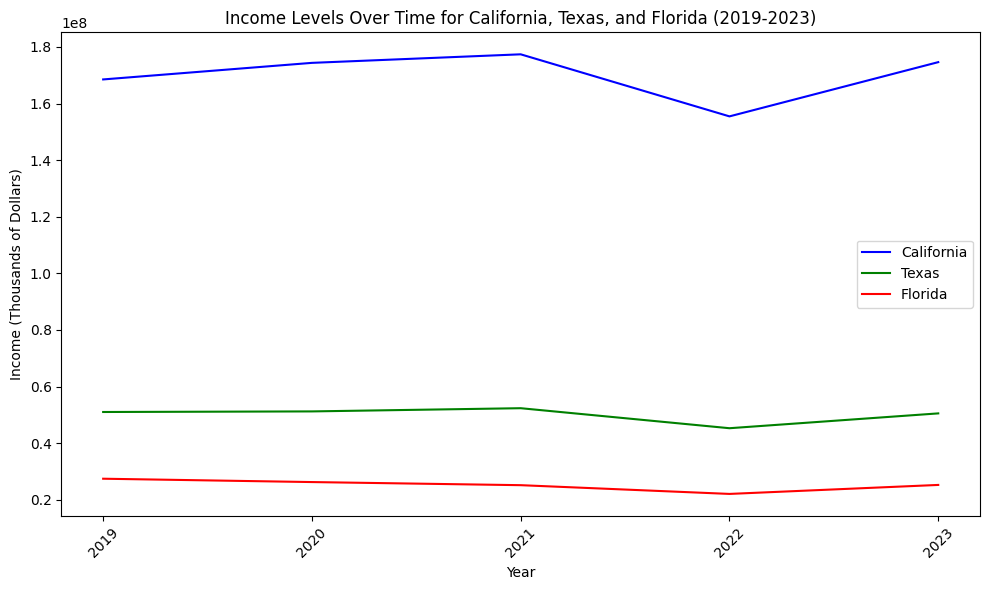

In [19]:
# Load the dataset for all three states (replace with your file paths)
california_df = pd.read_csv('Datasets/SAINC70_CA_2000_2023.csv')
texas_df = pd.read_csv('Datasets/SAINC70_TX_2000_2023.csv')
florida_df = pd.read_csv('Datasets/SAINC70_FL_2000_2023.csv')

# Define the years and categories you are interested in
years = ['2019', '2020', '2021', '2022', '2023']
categories = ['Current receipts, accrual basis ']

# Create a plot
plt.figure(figsize=(10,6))

# Filter and plot data for California
california_data = california_df[california_df["Description"].isin(categories)]
for index, row in california_data.iterrows():
    plt.plot(years, row[years].values, label="California", color='blue')

# Filter and plot data for Texas
texas_data = texas_df[texas_df["Description"].isin(categories)]
for index, row in texas_data.iterrows():
    plt.plot(years, row[years].values, label="Texas", color='green')

# Filter and plot data for Florida
florida_data = florida_df[florida_df["Description"].isin(categories)]
for index, row in florida_data.iterrows():
    plt.plot(years, row[years].values, label="Florida", color='red')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Income (Thousands of Dollars)')
plt.title('Income Levels Over Time for California, Texas, and Florida (2019-2023)')
plt.legend()

# Adjust the x-ticks for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Based on the population density and the personal income levels data extracted from the US BEA(Bureau of Economic Analysis), we can say that it would be beneficial to start a food business in California.

In [20]:
# Yelp Reviews Dataset

yelp_review = pd.read_json(r"C:\Users\akw97\Downloads\Yelp-JSON\Yelp JSON\yelp_dataset\yelp_academic_dataset_review.json")

yelp_review.head()

MemoryError: 